In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import keras
keras.__version__

from keras import models
from keras import layers

In [2]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


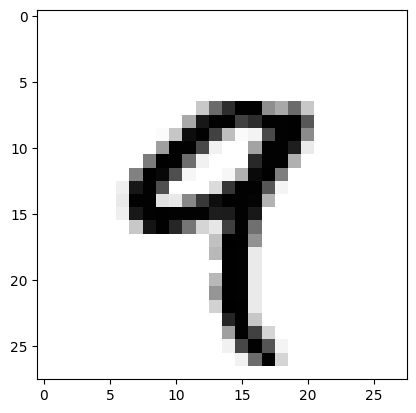

In [4]:
# 데이터의 확인
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

In [5]:
# 신경망을 만드는 부분
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# 데이터를 준비하는 부분
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [8]:
# 라벨 데이터를 카테고리 데이터로 변환
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
# 신경망의 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.2679 - accuracy: 0.9217
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1087 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0715 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0525 - accuracy: 0.9843
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0394 - accuracy: 0.9884


In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test loss : {}, test acc: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9816
test loss : 0.061590131372213364, test acc: 0.9815999865531921


In [14]:
# IMDB
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [15]:
train_data.shape

(25000,)

In [17]:
train_labels[0:5]

array([1, 0, 0, 1, 0])

In [19]:
max([max(sequence) for sequence in train_data])

9999

In [26]:
# 데이터를 준비
def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  print(result.shape)
  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1 
  return result

In [27]:
# 열거형(앞에 번호를 붙임)
a = [1,2,3,4]
for i, item in enumerate(a):
  print(i, item)

0 1
1 2
2 3
3 4


In [33]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [34]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [35]:
# 라벨 데이터도 실수형으로
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train[0], y_test[0])

1.0 0.0


In [55]:
# 신경망 - input, hidden layer
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [57]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=6,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/6
30/30 [==============================] - 3s 73ms/step - loss: 0.5421 - accuracy: 0.7787 - val_loss: 0.4212 - val_accuracy: 0.8486
Epoch 2/6
30/30 [==============================] - 1s 38ms/step - loss: 0.3368 - accuracy: 0.8941 - val_loss: 0.3197 - val_accuracy: 0.8836
Epoch 3/6
30/30 [==============================] - 1s 40ms/step - loss: 0.2489 - accuracy: 0.9157 - val_loss: 0.2863 - val_accuracy: 0.8889
Epoch 4/6
30/30 [==============================] - 1s 40ms/step - loss: 0.2006 - accuracy: 0.9315 - val_loss: 0.2778 - val_accuracy: 0.8887
Epoch 5/6
30/30 [==============================] - 1s 44ms/step - loss: 0.1697 - accuracy: 0.9431 - val_loss: 0.2795 - val_accuracy: 0.8882
Epoch 6/6
30/30 [==============================] - 2s 56ms/step - loss: 0.1427 - accuracy: 0.9545 - val_loss: 0.2841 - val_accuracy: 0.8859


In [42]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

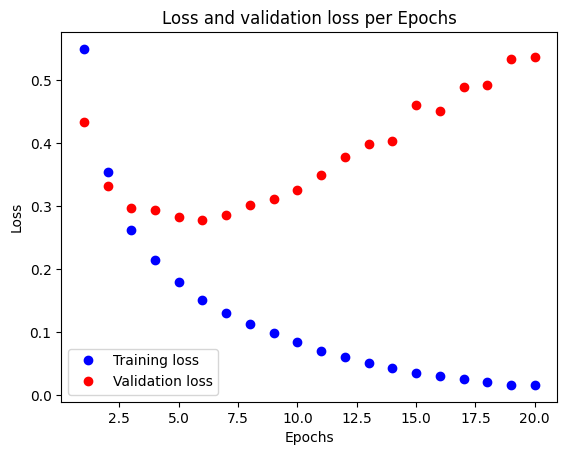

In [52]:
acc = history_dict['accuracy']
loss = history_dict['loss']
val_acc = history_dict['val_accuracy']
val_loss = history_dict['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'ro',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and validation loss per Epochs')
plt.legend()

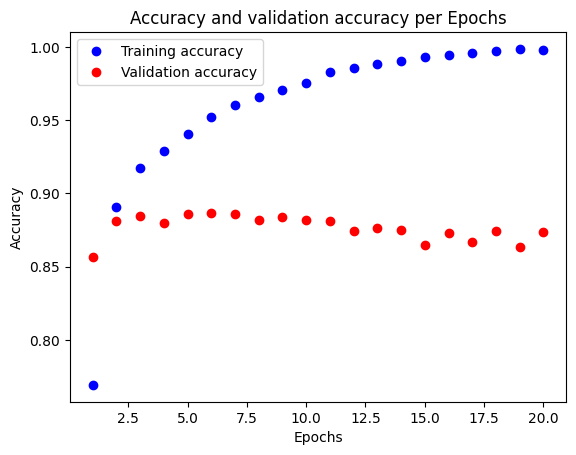

In [54]:
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'ro',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy and validation accuracy per Epochs')
plt.legend()

In [58]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.14805904],
       [0.9998652 ],
       [0.95514464],
       ...,
       [0.0702391 ],
       [0.0932949 ],
       [0.62417686]], dtype=float32)

In [59]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("loss : {}, accuracy : {}".format(test_loss, test_acc))

782/782 [==============================] - 2s 3ms/step - loss: 0.3034 - accuracy: 0.8792
loss : 0.30340203642845154, accuracy : 0.8792399764060974
